In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("spam.csv")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# 1. data cleaning
# 2. EDA
# 3. text preprocessing
# 4. model building
# 5. Evaluation
# 6. improvement
# 7. website

# Data cleaning

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.rename(columns={'v1':'check','v2':'message'},inplace = True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df["check"]=encoder.fit_transform(df["check"])

In [10]:
df.isnull().sum()

check      0
message    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [12]:
df = df.drop_duplicates(keep='first')
df

,check,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10737,0,"Subject: fw : crosstex energy , driscoll ranch..."
10738,0,Subject: put the 10 on the ft\r\nthe transport...
10739,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10741,0,Subject: industrial worksheets for august 2000...


# EDA

In [14]:
df['check'].value_counts()

0    8047
1    2115
Name: check, dtype: int64

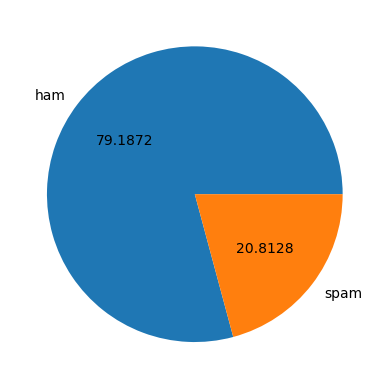

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['check'].value_counts(), labels=['ham','spam'],autopct="%0.4f")
plt.show()

In [16]:
import nltk as nk
nk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['no._char']=df['message'].apply(len)

In [21]:
df

,check,message,no._char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
10737,0,"Subject: fw : crosstex energy , driscoll ranch...",869
10738,0,Subject: put the 10 on the ft\r\nthe transport...,534
10739,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114
10741,0,Subject: industrial worksheets for august 2000...,573


In [22]:
df['no._words']= df['message'].apply(lambda x: len(nk.word_tokenize(x)))

In [23]:
df['no._sentence']= df['message'].apply(lambda x: len(nk.sent_tokenize(x)))

In [24]:
df

,check,message,no._char,no._words,no._sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
10737,0,"Subject: fw : crosstex energy , driscoll ranch...",869,197,9
10738,0,Subject: put the 10 on the ft\r\nthe transport...,534,156,7
10739,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114,306,13
10741,0,Subject: industrial worksheets for august 2000...,573,112,20


In [26]:
df.describe()

,check,no._char,no._words,no._sentence
count,10162.000000,10162.000000,10162.000000,10162.000000
mean,0.208128,565.625172,124.203208,7.577347
std,0.405989,1193.312821,262.099908,20.438770
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,56.000000,14.000000,1.000000
50%,0.000000,143.000000,31.000000,3.000000
75%,0.000000,540.000000,122.000000,7.000000
max,1.000000,32258.000000,8863.000000,1204.000000


In [27]:
#ham
df[df['check']==0][["no._char","no._words","no._sentence"]].describe()

,no._char,no._words,no._sentence
count,8047.000000,8047.000000,8047.000000
mean,476.118429,110.759662,6.138934
std,1037.113374,247.282194,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,107.000000,26.000000,2.000000
75%,433.500000,104.000000,6.000000
max,32258.000000,8863.000000,1204.000000


In [28]:
#spam
df[df['check']==1][["no._char","no._words","no._sentence"]].describe()

,no._char,no._words,no._sentence
count,2115.000000,2115.000000,2115.000000
mean,906.173995,175.352246,13.050118
std,1613.735247,306.840487,28.351146
min,11.000000,2.000000,1.000000
25%,150.000000,29.000000,3.000000
50%,331.000000,67.000000,5.000000
75%,863.500000,174.000000,13.000000
max,22073.000000,3963.000000,693.000000


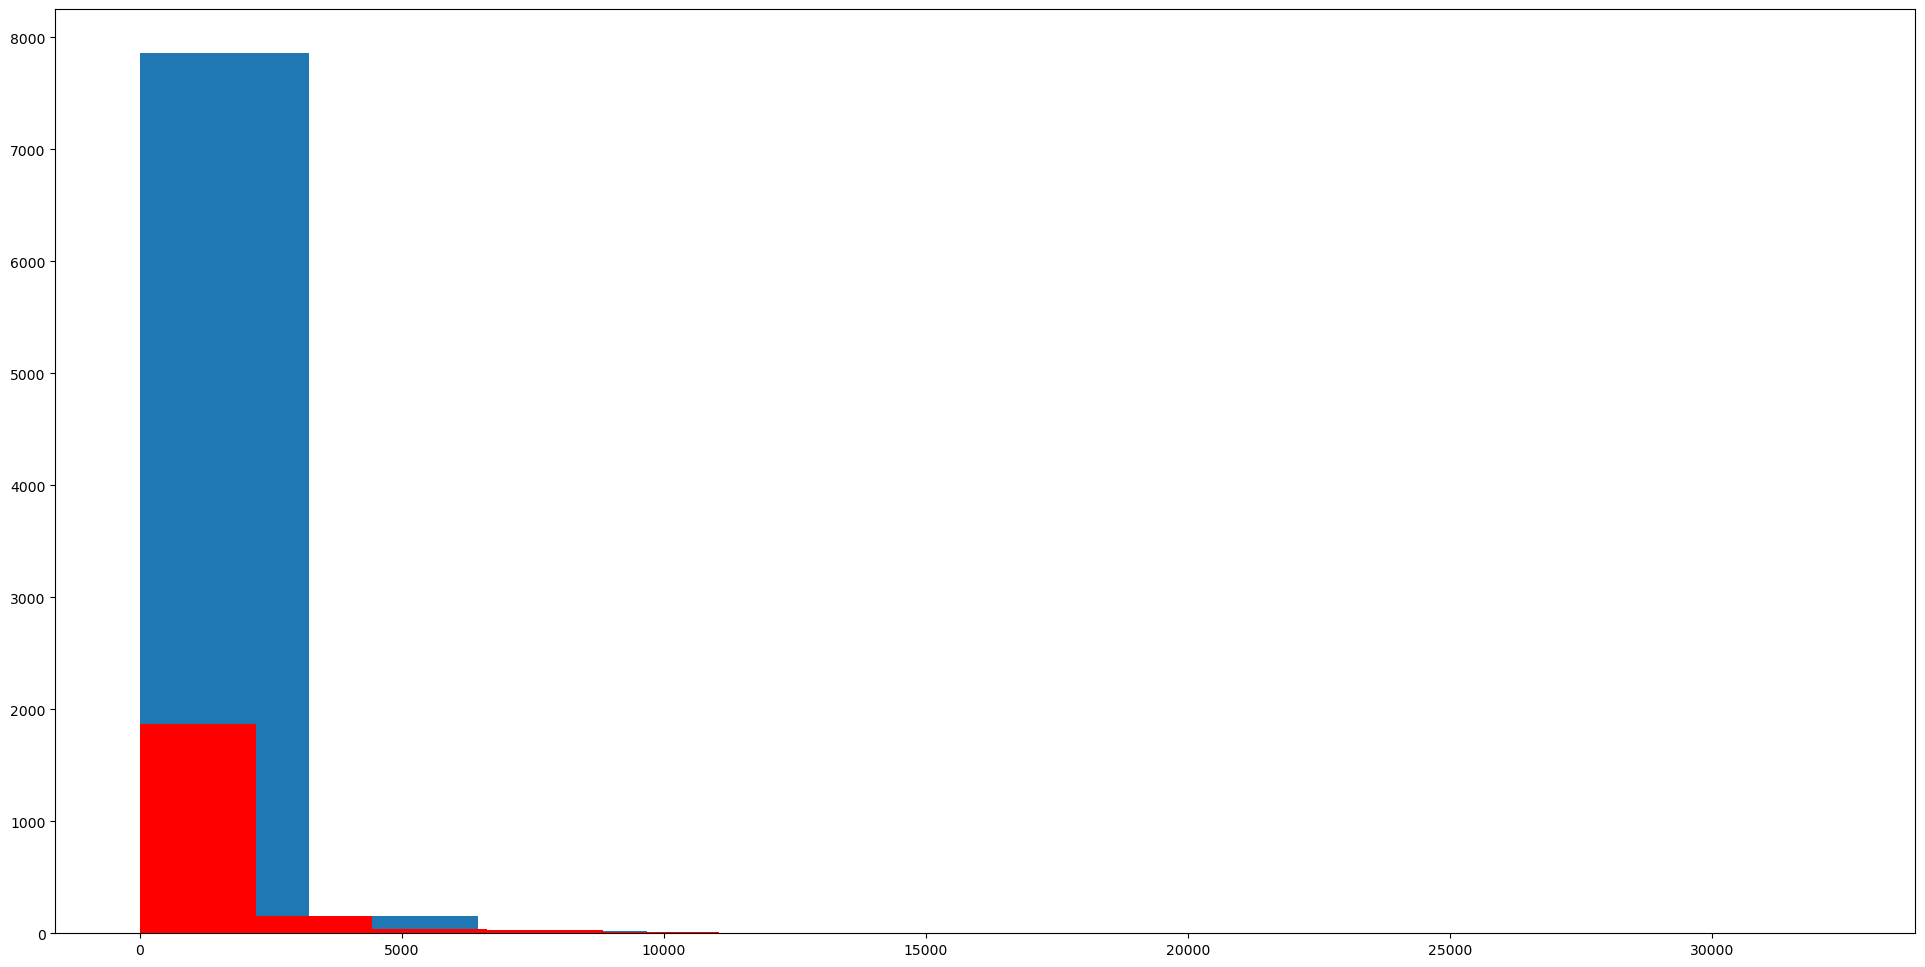

In [29]:
plt.figure(figsize=(24,12))
plt.hist(df[df['check']==0]['no._char'])
plt.hist(df[df['check']==1]['no._char'],color="red")
plt.show()

<Axes: xlabel='no._char', ylabel='Count'>

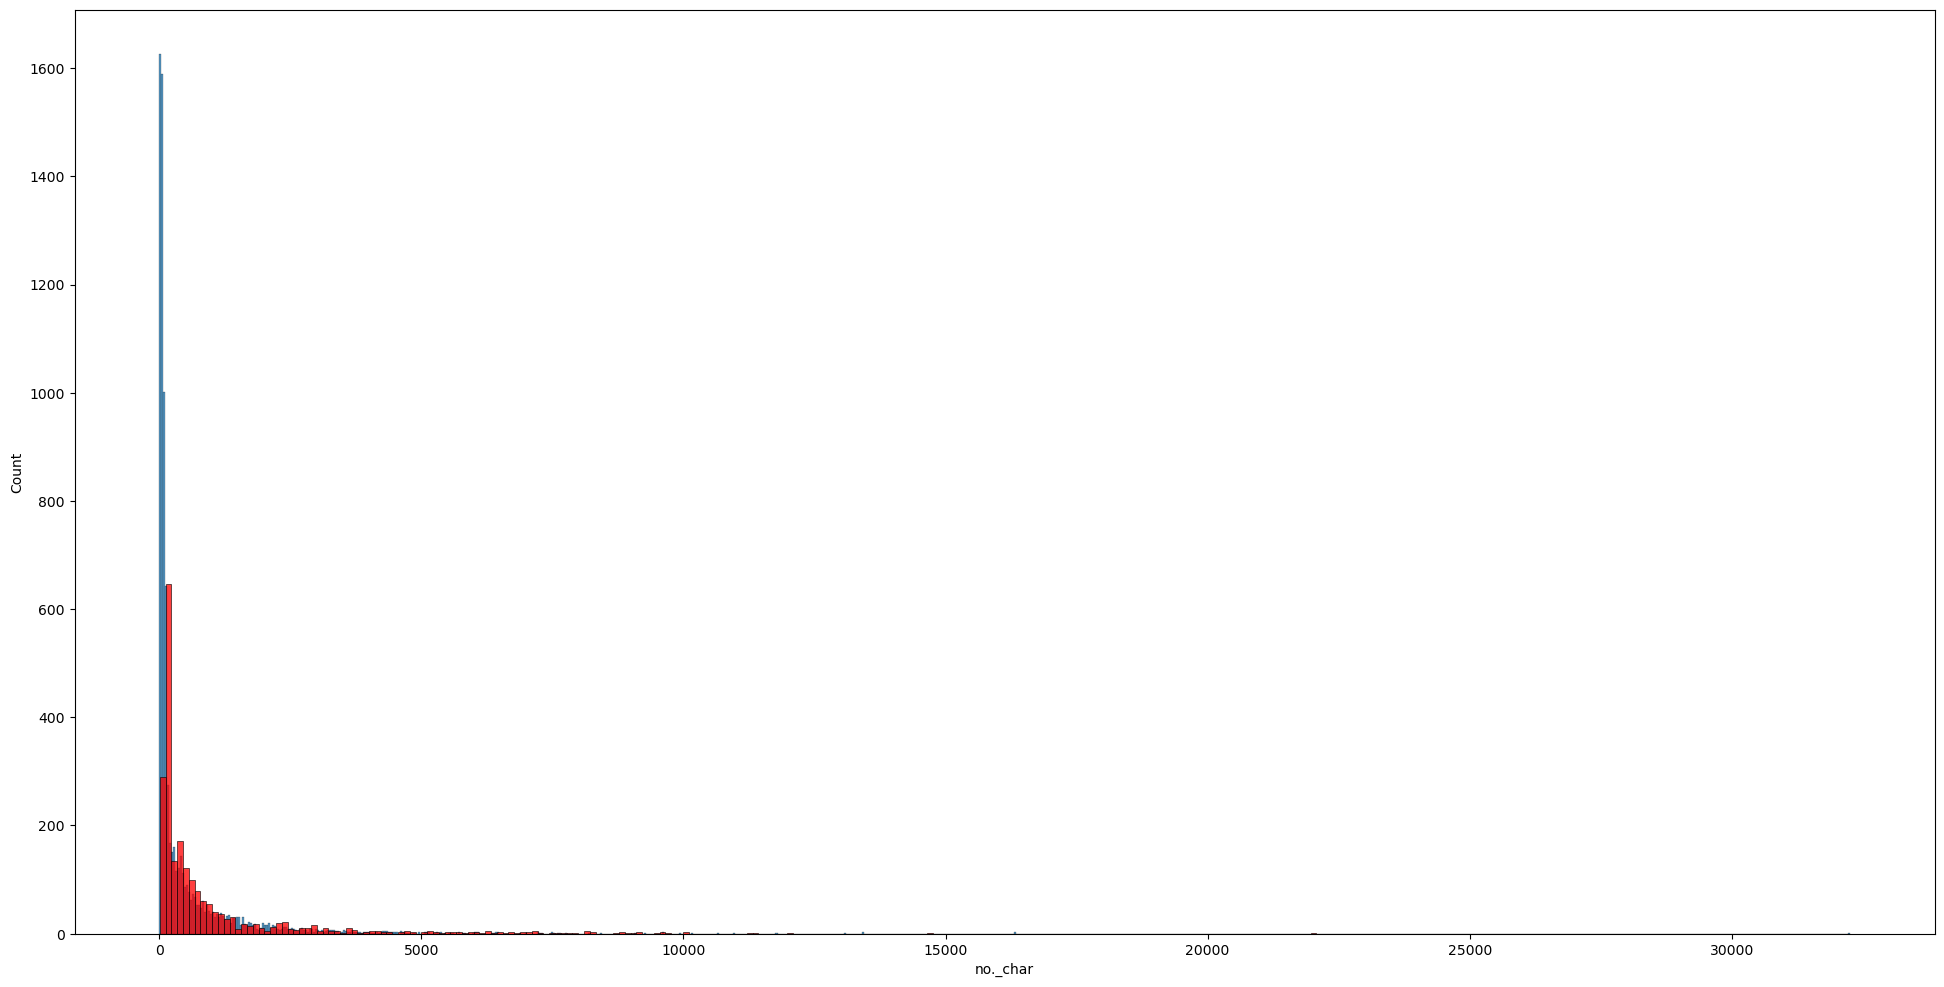

In [30]:
plt.figure(figsize=(24,12))
import seaborn as sn
sn.histplot(df[df['check']==0]['no._char'])
sn.histplot(df[df['check']==1]['no._char'],color='red')

<Axes: xlabel='no._words', ylabel='Count'>

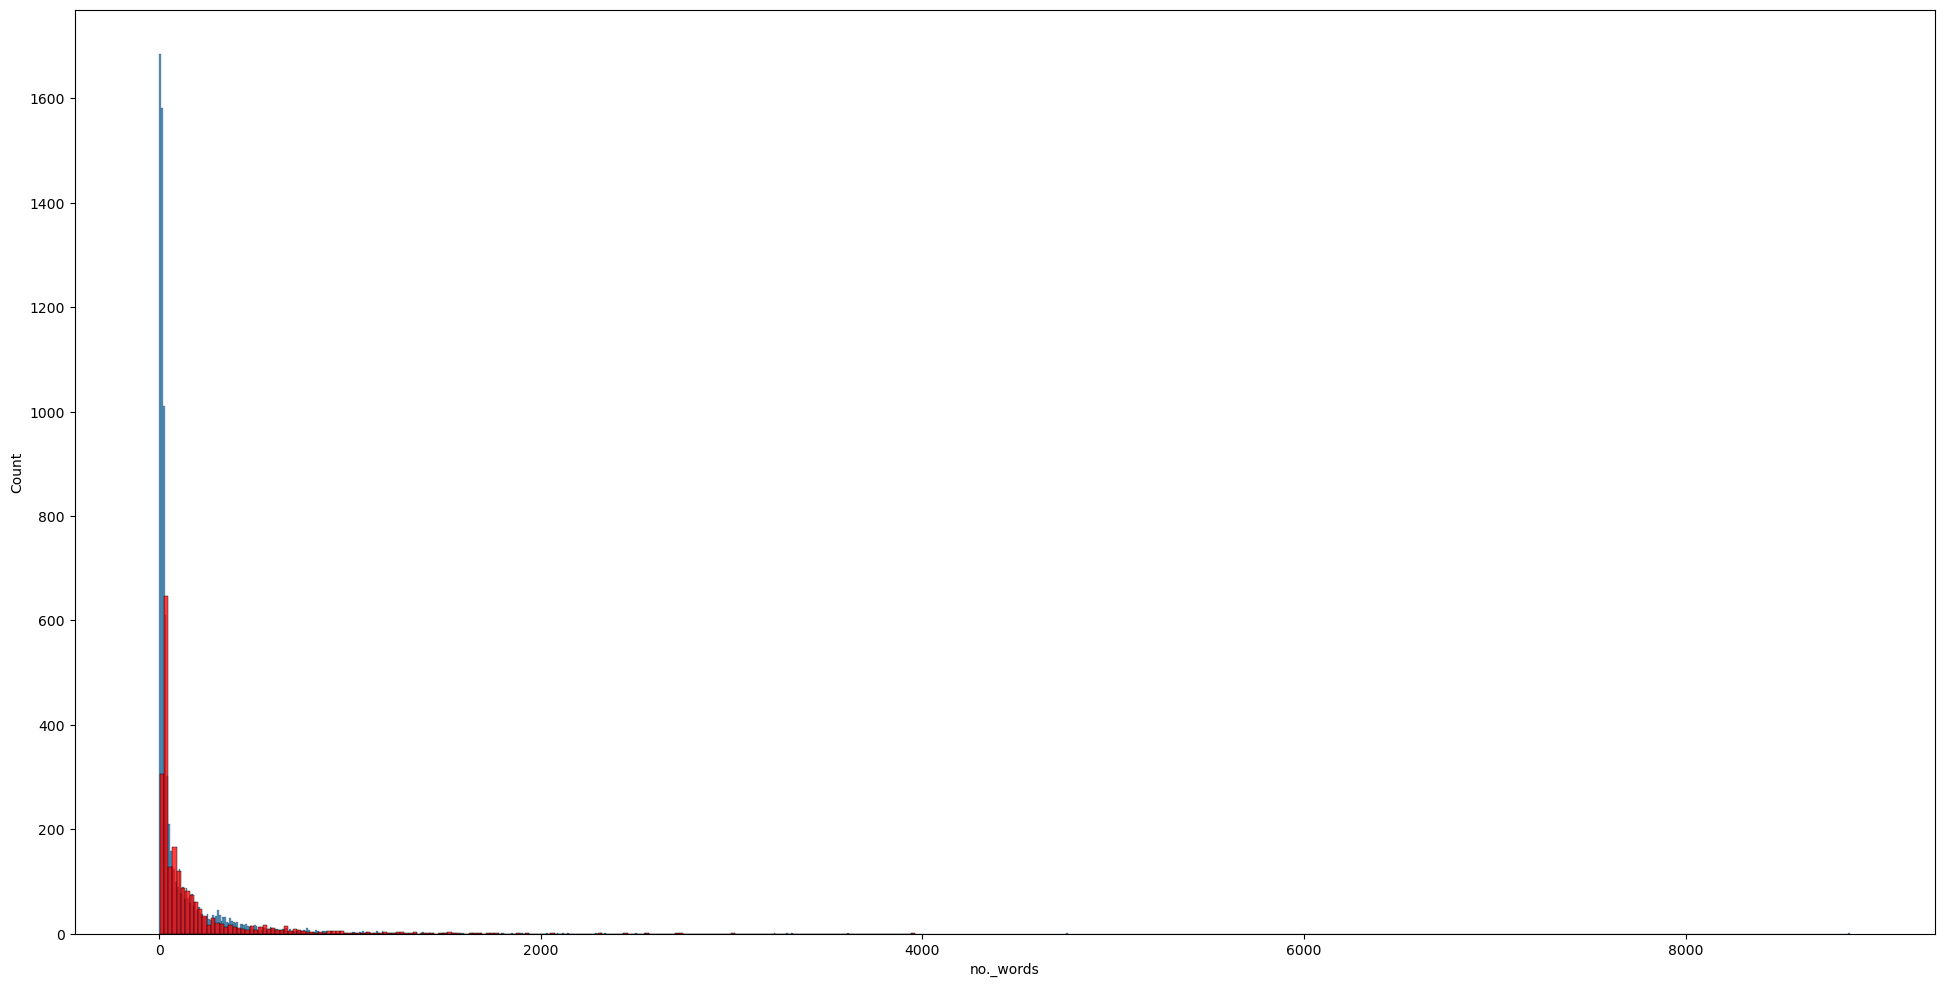

In [31]:
plt.figure(figsize=(24,12))
sn.histplot(df[df['check']==0]['no._words'])
sn.histplot(df[df['check']==1]['no._words'],color='red')

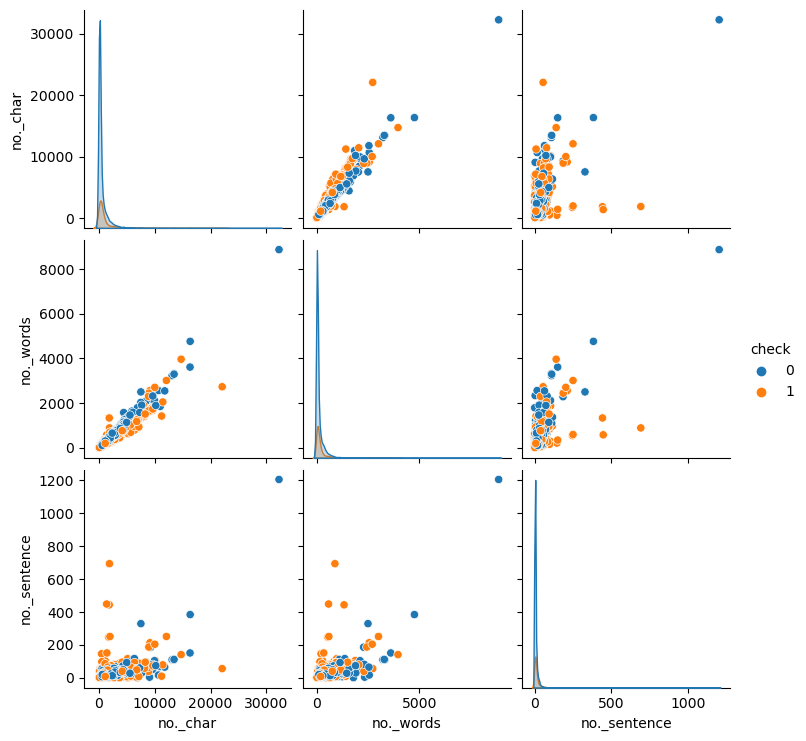

In [32]:
sn.pairplot(df,hue="check")

C:\Users\Manas\AppData\Local\Temp\ipykernel_7328\3793382165.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True)


<Axes: >

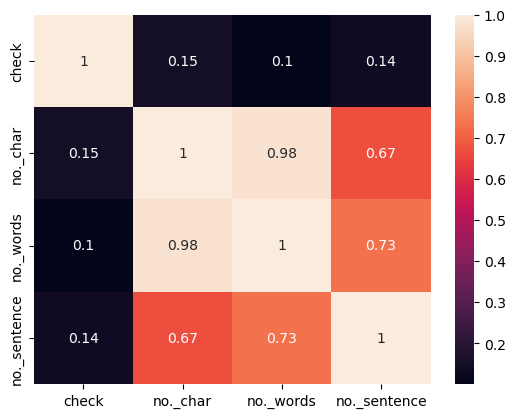

In [118]:
sn.heatmap(df.corr(),annot=True)

# data pre-processing
⚫lower case
⚫tokenization
⚫removing special char
⚫removing stop wrds and punctuation
⚫stemming


In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string as str
str.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
def trans_text(text):
    text=text.lower()
    text = nk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in str.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [37]:
df['trans_txt']=df['message'].apply(trans_text)

In [38]:
df

,check,message,no._char,no._words,no._sentence,trans_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
10737,0,"Subject: fw : crosstex energy , driscoll ranch...",869,197,9,subject fw crosstex energi driscol ranch 1 3 m...
10738,0,Subject: put the 10 on the ft\r\nthe transport...,534,156,7,subject put 10 ft transport volum decreas 2500...
10739,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114,306,13,subject 3 4 2000 follow nom hpl take extra 15 ...
10741,0,Subject: industrial worksheets for august 2000...,573,112,20,subject industri worksheet august 2000 activ a...


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=5000,height=5000,min_font_size=10,background_color='white')

In [40]:
spam_wc = wc.generate(df[df['check']==1]['trans_txt'].str.cat(sep=" "))

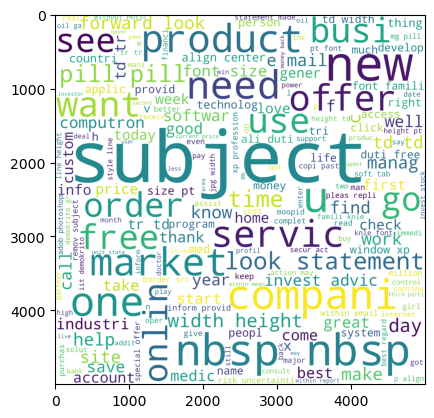

In [41]:
plt.imshow(spam_wc)

In [42]:
ham_wc = wc.generate(df[df['check']==0]['trans_txt'].str.cat(sep=" "))

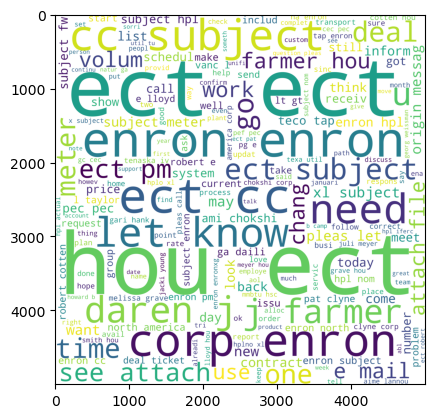

In [43]:
plt.imshow(ham_wc)

In [44]:
spam_corp = []
for t in df[df['check']==1]['trans_txt'].tolist():
    for w in t.split():
        spam_corp.append(w)

In [45]:
len(spam_corp)

206531

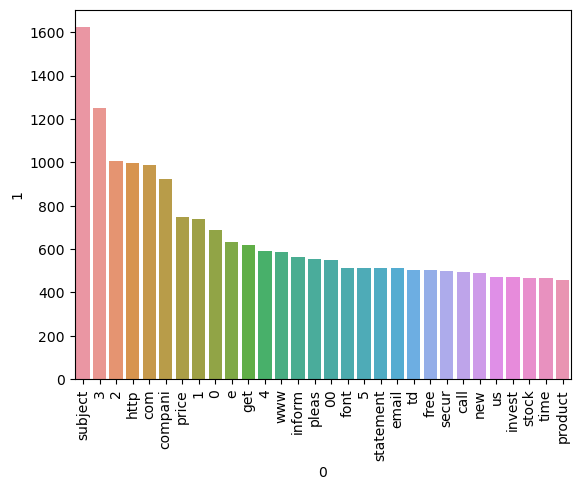

In [46]:
from collections import Counter
sn.barplot(x=pd.DataFrame(Counter(spam_corp).most_common(30))[0],y=pd.DataFrame(Counter(spam_corp).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
ham_corp = []
for t in df[df['check']==0]['trans_txt'].tolist():
    for w in t.split():
        ham_corp.append(w)

In [48]:
len(ham_corp)

415879

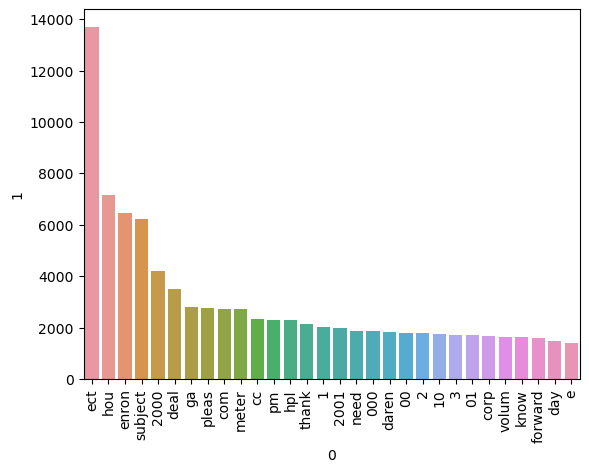

In [49]:
sn.barplot(x=pd.DataFrame(Counter(ham_corp).most_common(30))[0],y=pd.DataFrame(Counter(ham_corp).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# model build

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [63]:
X = tf.fit_transform(df['trans_txt']).toarray()

In [64]:
X.shape

(10162, 45520)

In [65]:
y = df['check'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [71]:
gb.fit(X_train,y_train)
y_pred1 = gb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8991637973438269
[[1488  136]
 [  69  340]]
0.7142857142857143


In [72]:
mb.fit(X_train,y_train)
y_pred2 = mb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8903098868666994
[[1624    0]
 [ 223  186]]
1.0


In [73]:
bb.fit(X_train,y_train)
y_pred3 = bb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8706345302508608
[[1585   39]
 [ 224  185]]
0.8258928571428571


In [ ]:
#tf with mb

In [74]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mb,open('model.pkl','wb'))